# 5. Capstone Project: Data Preparation II

***

![headerall](./images/headers/header_all.jpg)

##  Goals

### Project:
In this work, we will first analyze where and when traffic congestion is highest and lowest in New York State. We will then build different machine learning models capable of predicting cab travel times in and around New York City using only variables that can be easily obtained from a smartphone app or a website. We will then compare their performance and explore the possibility of using additional variables such as weather forecasts and holidays to improve the predictive performance of the models.

### Section:
In this section, data will be prepared for the next steps, i.e., exploratory data analysis and machine learning model building. First, we will collect and import the necessary datasets. Next, we will review each of these datasets to fully understand the data and its structure, including the different variables available, their format, and their relevance to the project. Finally, we will perform data cleaning and manipulation, as well as feature engineering, and encoding.

The data preparation will be divided into two subsections, the first dedicated to the external datasets (Data Preparation Part I) and the second to the New York City Taxi Trip data set (Data Preparation Part II). Finally, external datasets will be merged with the primary one.

## Data
### External Datasets:
- Weather Forecast: The 2018 NYC weather forecast was collected from the [National Weather Service Forecast Office](https://w2.weather.gov/climate/index.php?wfo=okx) website. Daily measurements were taken from January to December 2018 in Central Park. These measures are given in imperial units and include daily minimum and maximum temperatures, precipitations, snowfall, and snow depth.

- Holidays: The 2018 NYC holidays list was collected from the [Office Holiday](https://www.officeholidays.com/countries/usa/new-york/2021) website. The dataset contains the name, date, and type of holidays for New York.

- Taxi Zones: The NYC Taxi Zones dataset was collected from the [NYC Open Data](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc) website. It contains the pickup and drop-off zones (Location IDs) for the Yellow, Green, and FHV Trip Records. The taxi zones are based on the NYC Department of City Planning’s Neighborhood.

### Primary Datasets:

- Taxi Trips: The 2018 NYC Taxi Trip dataset was collected from the [Google Big Query](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-tlc-trips?project=jovial-monument-300209&folder=&organizationId=) platform. The dataset contains more than 100'000'000 Yellow Taxi Trip records for 2018 and contains an extensive amount of variables including the pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

***
## Table of Content:
    1. Data Preparation
        1.1 External Datasets
            1.1.1 Weather Forecast Dataset
            1.1.2 Holidays Dataset
            1.1.3 Taxi Zones Dataset
        1.2 Primary Dataset
            1.2.1 Taxi Trips Dataset
    2. Exploratory Data Analysis
        2.1 Primary Dataset
            2.1.1 Temporal Analysis
            2.1.2 Spatio-Temporal Analysis
        2.2 External Datasets
            2.2.1 Temporal Analysis of Weather Data
            2.2.2 Temporal Analysis of Holidays Data
        2.3 Combined Dataset
            2.3.1 Overall Features Correlation
    3. Machine Learning Models

***
## Python Libraries and Magic commands Import

In [1]:
# Import python core libraries
import os

# Import data processing libraries
import pandas as pd
import numpy as np

# Import Visualization librairies
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split

In [2]:
# Set up magic commands
%matplotlib inline
%config Completer.use_jedi = False

***
## Data Import

In [3]:
# Import the weather forecasts dataset
weather_df = pd.read_pickle(r'data/processed/weather.pickle')

# Import the holidays dataset
holidays_df = pd.read_pickle(r'data/processed/holidays.pickle')

# Import the zones dataset
zones_df = pd.read_pickle(r'data/processed/zones.pickle')

***
## Functions import

In [4]:
# Define a function that transform column headers to titles
def to_title(data, sep='_'):
    return [s.replace(sep, ' ').title() for s in data]

In [5]:
# Define a function that compute and display descriptive statistics for selected columns
def outliers_distribution(data, columns, statistics, percentiles):

    # Create an empty dictionnary to collect the columns' descriptive statistics
    frame = {}

    # Iterate over the given numerical columns
    for column in columns:

        # Compute the descriptive statistics for records above the column's given percentile
        output = (
            data.loc[data[column] > percentiles[column].iloc[0], column]
            .describe()[statistics]
            .round(2)
        )

        # Add the column's descriptive statistics to the dictionnary
        frame[column] = output

    # Return the columns' descriptive statistics as a data frame
    return pd.DataFrame(frame)

In [6]:
# Define a function that display scatter plots of selected numerical columns
def plot_scatter(data, columns, colnames, variable, ncols=1, nrows=1):

    varname = variable.replace("_", " ").title()

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, sharey=True, figsize=(ncols * 5, nrows * 5)
    )

    # Flatten axes for 2D figures
    if ncols > 1 or nrows > 1:
        axes = axes.ravel()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        sns.scatterplot(x=col, y=variable, data=data, ax=ax, s=10)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.set_ylim(0)
        ax.tick_params(labelsize=14)
        ax.set_xlabel(colname, fontsize=14)
        ax.set_ylabel(varname, fontsize=14)
        ax.set_title(f"{varname} vs {colname}", fontsize=16)
        ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

In [7]:
# Define a function that display scatter plots of selected numerical columns
def plot_histplot(data, columns, colnames, ncols=1, nrows=1):

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, sharey=True, figsize=(ncols * 5, nrows * 5)
    )

    # Flatten axes for 2D figures
    if ncols > 1 or nrows > 1:
        axes = axes.ravel()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        sns.histplot(x=col, bins=20, data=data, ax=ax, edgecolor="white", alpha=0.7)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.tick_params(labelsize=14)
        ax.set_xlabel(colname, fontsize=14)
        ax.set_ylabel("Count", fontsize=14)
        ax.set_title(colname, fontsize=16)
        ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

In [8]:
# Define a function that display individual boxplot of selected numerical columns
def plot_boxplot(data, columns, colnames, ncols=1, nrows=1):
    # Create a figure with n columns and rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))

    # Flatten axes for 2D figures
    if ncols > 1 or nrows > 1:
        axes = axes.ravel()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        sns.boxplot(
            y=col, data=data, ax=ax, width=0.35, linewidth=1, boxprops=dict(alpha=0.7)
        )
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.yaxis.set_ticks_position("none")
        ax.xaxis.set_ticks([])
        ax.tick_params(labelsize=14)
        ax.set_xlabel(colname, fontsize=14)
        ax.set_ylabel(None)
        ax.set_title(colname, fontsize=16)
        ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

In [9]:
# Define a function that display individual violinplot of selected numerical columns
def plot_violinplot(data, columns, colnames, ncols=1, nrows=1, color="C0"):

    # Create a figure with n columns and rows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))

    # Flatten axes for 2D figures
    if ncols > 1 or nrows > 1:
        axes = axes.ravel()

    # Generate the plots
    for ax, col, colname in zip(axes, columns, colnames):
        violin_plot = ax.violinplot(data[col])

        # Change color of the violin plot
        for pc in violin_plot["bodies"]:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)

        violin_plot["cbars"].set_edgecolor("black")
        violin_plot["cmins"].set_edgecolor("black")
        violin_plot["cmaxes"].set_edgecolor("black")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.yaxis.set_ticks_position("none")
        ax.tick_params(labelsize=14)
        ax.set_title(colname, fontsize=16)
        ax.grid()

    # Adjust the padding between and around subplots
    fig.tight_layout(pad=0.5, w_pad=0.5)

    # Display the figure
    plt.show()

***
# 1. Data Preparation
## 1.2 Data Preparation: Taxi Trips Dataset

### Goals:

Explore a subset (10%) of the 2018 NYC yellow taxi trip dataset dataset and perform data cleaning and manipulation, as well as feature engineering, binning and encoding if needed.

### Code:

In [10]:
# Create a global variable containing the credentials to query Google Big Query Servers
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"credentials\exts-ml-5e5656f1d391.json"

# Create an empty data frame
records_df = pd.DataFrame()

# Create a row offest
row_offset = 0

# Create a row limit
row_limit = 10000000

# Create a row offest counter
row_counter = 10000000

# Get the NYC taxi dataset in chuncks of 10M to avoid insufficient memory issues
while row_counter == row_limit:

    print(f"Fetching rows from {row_offset} to {row_offset + row_counter}:")

    # Create a query to fetch and transform the NYC taxi dataset from the Google Big Query servers
    query = f"""
     SELECT
         pickup_datetime,
         dropoff_datetime,
         passenger_count,
         trip_distance,
         tolls_amount,
         fare_amount,
         pickup_location_id,
         dropoff_location_id,
         TIMESTAMP_DIFF(TIMESTAMP(pickup_datetime), TIMESTAMP(dropoff_datetime), MINUTE) as trip_duration
     FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
     LIMIT {row_limit}
     OFFSET {row_offset};
     """
    # Get a chunck of the Google Big Query servers
    df = pd.read_gbq(
        query, project_id="exts-ml", dialect="standard", progress_bar_type="tqdm"
    )

    # Get a random sample of 1% of the NYC taxi dataset chunck
    records_df = records_df.append(
        df.sample(frac=0.010, replace=False, random_state=0), ignore_index=True
    )

    # Update the row counter with the current data frame lenght
    row_counter = len(df.index)

    # Update the row offest
    row_offset += row_counter

Fetching rows from 0 to 10000000:


Downloading:   2%|▍                 | 215870/10000000 [00:34<26:03, 6256.98rows/s]

KeyboardInterrupt: 

In [14]:
# Open data frame
records_df = pd.read_pickle('data/raw/taxi_records_v1.pickle')

records_df['trip_duration'] = (
   records_df.dropoff_datetime - records_df.pickup_datetime
).dt.seconds / 60

records_df['pickup_location_id'] = records_df['pickup_location_id'].astype('int64')
records_df['dropoff_location_id'] = records_df['dropoff_location_id'].astype('int64')

**Notes:** the data frame contains 1% of all 2018 NYC cab fare records, totaling 11,223,463 data points. Most of the numeric columns are the wrong type and will need to be converted from string (Object) to float or integer. Columns may also contain null values, and since most machine learning algorithms cannot properly process them, we will first need to check that each column does not contain any before continuing with data cleaning and feature engineering/coding.

In [15]:
# Display the first five rows of the data frame
records_df.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,tolls_amount,fare_amount,pickup_location_id,dropoff_location_id,trip_duration
0,2018-04-26 12:11:19,2018-04-26 12:24:34,3,8.90,2.64,25.0,143,220,13.250000
1,2018-06-19 10:02:34,2018-06-19 10:45:46,1,15.84,0.00,48.0,138,85,43.200000
2,2018-09-05 13:51:40,2018-09-05 14:33:07,1,11.10,5.76,37.5,138,142,41.450000
3,2018-05-11 10:20:58,2018-05-11 10:46:27,2,8.49,0.00,27.5,45,41,25.483333
4,2018-12-16 18:21:08,2018-12-16 18:46:04,6,7.79,0.00,24.5,229,106,24.933333


In [16]:
# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122346 entries, 0 to 1122345
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   pickup_datetime      1122346 non-null  datetime64[ns]
 1   dropoff_datetime     1122346 non-null  datetime64[ns]
 2   passenger_count      1122346 non-null  int64         
 3   trip_distance        1122346 non-null  float64       
 4   tolls_amount         1122346 non-null  float64       
 5   fare_amount          1122346 non-null  float64       
 6   pickup_location_id   1122346 non-null  int64         
 7   dropoff_location_id  1122346 non-null  int64         
 8   trip_duration        1122346 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 77.1 MB


In [17]:
# Display the number of empty cells in each column of the data frame
records_df.isna().sum()

pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
tolls_amount           0
fare_amount            0
pickup_location_id     0
dropoff_location_id    0
trip_duration          0
dtype: int64

In [ ]:
**Notes:** 

In [18]:
# Split the dataset into a train and test data frame
train_df, test_df = train_test_split(records_df, test_size=0.2, random_state=0)

**Notes:** the dataset does not contain any null values.

In [19]:
# Define numerical columns to be converted to float
num_cols = ['trip_distance', 'tolls_amount', 'fare_amount', 'trip_duration']

# Convert numerical columns to float
records_df[num_cols] = records_df[num_cols].astype('float64')

# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122346 entries, 0 to 1122345
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   pickup_datetime      1122346 non-null  datetime64[ns]
 1   dropoff_datetime     1122346 non-null  datetime64[ns]
 2   passenger_count      1122346 non-null  int64         
 3   trip_distance        1122346 non-null  float64       
 4   tolls_amount         1122346 non-null  float64       
 5   fare_amount          1122346 non-null  float64       
 6   pickup_location_id   1122346 non-null  int64         
 7   dropoff_location_id  1122346 non-null  int64         
 8   trip_duration        1122346 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 77.1 MB


**Notes:** the columns have been correctly converted to float. Values of numeric columns will be converted to metric units. In addition, columns containing dates will be checked for records dating from before or after 2018.

In [20]:
# Convert the trip distance from miles to kilometers
records_df["trip_distance"] = np.multiply(records_df["trip_distance"], 1.60934)

# Display the records with pickup dates out of the date range (2018.01.01 - 2018.01.01)
records_df[
    (records_df['pickup_datetime'] < '2018.01.01')
    | (records_df['pickup_datetime'] > '2019.01.01')
]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,tolls_amount,fare_amount,pickup_location_id,dropoff_location_id,trip_duration
47651,2008-12-31 23:04:03,2008-12-31 23:52:46,3,8.159354,0.00,30.5,262,43,48.716667
88284,2009-01-01 19:00:20,2009-01-01 19:31:20,1,20.486898,0.00,36.5,138,132,31.000000
146270,2009-01-01 01:20:49,2009-01-01 01:54:23,1,28.372664,5.76,52.0,132,107,33.566667
199646,2017-09-18 10:55:06,2017-09-18 10:56:07,1,0.000000,0.00,1.0,264,264,1.016667
232220,2009-01-01 00:02:33,2009-01-01 00:11:27,1,1.303565,0.00,6.5,163,230,8.900000
239099,2017-12-31 20:54:59,2017-12-31 21:05:32,6,2.703691,0.00,9.0,87,148,10.550000
324569,2008-12-31 23:08:11,2008-12-31 23:19:10,2,2.043862,0.00,8.0,230,170,10.983333
377679,2009-01-01 00:03:46,2009-01-01 00:07:09,2,0.000000,0.00,4.0,193,193,3.383333
384671,2019-02-13 06:20:00,2019-02-13 06:29:04,6,2.446197,0.00,8.0,186,137,9.066667
475996,2019-01-01 00:22:41,2019-01-01 00:32:06,2,2.269169,0.00,8.0,161,140,9.416667


**Notes:** over a dozen records date from before or after 2018. These records will be removed from the dataset.

In [21]:
# Remove records with pickup dates below 2018.01.01 and above 2018.01.01
records_df = records_df[
    (records_df['pickup_datetime'] >= '2018.01.01')
    & (records_df['pickup_datetime'] <= '2019.01.01')
]

# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122330 entries, 0 to 1122345
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   pickup_datetime      1122330 non-null  datetime64[ns]
 1   dropoff_datetime     1122330 non-null  datetime64[ns]
 2   passenger_count      1122330 non-null  int64         
 3   trip_distance        1122330 non-null  float64       
 4   tolls_amount         1122330 non-null  float64       
 5   fare_amount          1122330 non-null  float64       
 6   pickup_location_id   1122330 non-null  int64         
 7   dropoff_location_id  1122330 non-null  int64         
 8   trip_duration        1122330 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 85.6 MB


**Notes:** the 16 records with dates out of range were removed from the dataset.

In [22]:
# Display some descriptive statistics
records_df.describe().round(2)

,passenger_count,trip_distance,tolls_amount,fare_amount,pickup_location_id,dropoff_location_id,trip_duration
count,1122330.00,1122330.00,1122330.00,1122330.00,1122330.00,1122330.00,1122330.00
mean,1.60,4.64,0.34,13.02,163.23,161.47,17.24
std,1.24,5.98,1.78,189.30,66.42,70.36,66.13
min,0.00,0.00,-18.00,-275.00,1.00,1.00,0.00
25%,1.00,1.54,0.00,6.50,114.00,107.00,6.58
50%,1.00,2.57,0.00,9.00,162.00,162.00,10.97
75%,2.00,4.72,0.00,14.50,233.00,233.00,18.08
max,9.00,171.31,770.76,200005.50,265.00,265.00,1439.97


**Notes:** Most numerical columns contain extreme and erroneous values. For instance, according to the [official NYC Taxi](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) website, the maximum number of passengers allowed by law in a yellow taxi is four in a four-passenger taxi or five in a five-passenger taxi. Therefore, trips with more than five passengers are either errors or the result of taxi drivers picking up additional passengers en route to their final destination. Some records have negative, null or extreme values the number of passenger, distance traveled, toll amount and fare amount. Taxi trip records with null, extreme or erroneous values will be removed from the dataset.

In [23]:
# Define the name of numerical columns
num_cols = [
    'passenger_count',
    'trip_distance',
    'tolls_amount',
    'fare_amount',
    'trip_duration',
]

# Define the name of numerical columns
num_colnames = to_title(num_cols)

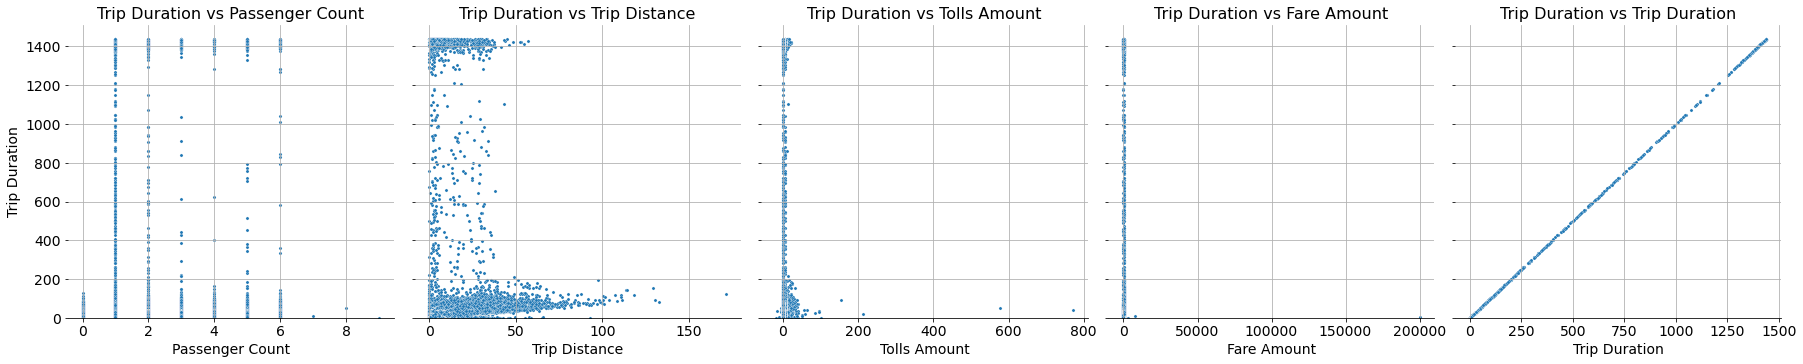

In [24]:
# Display scatterplot of numerical columns
plot_scatter(records_df, num_cols, num_colnames, 'trip_duration', ncols=len(num_cols))

Downloading:   2%|▎               | 215870/10000000 [01:24<1:03:48, 2555.37rows/s]


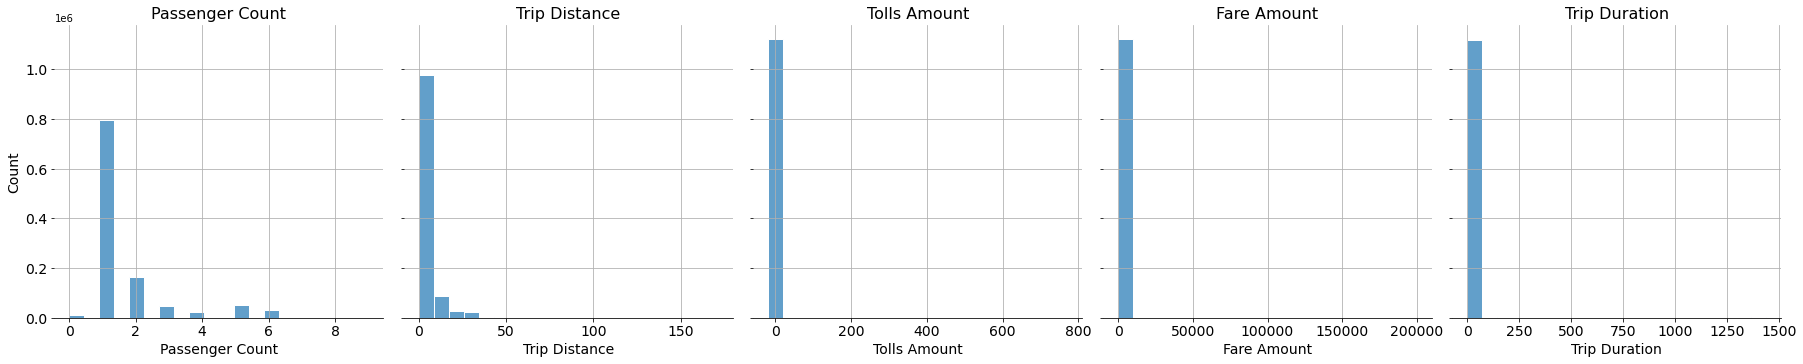

In [25]:
# Display histograms of numerical columns
plot_histplot(records_df, num_cols, num_colnames, ncols=len(num_cols))

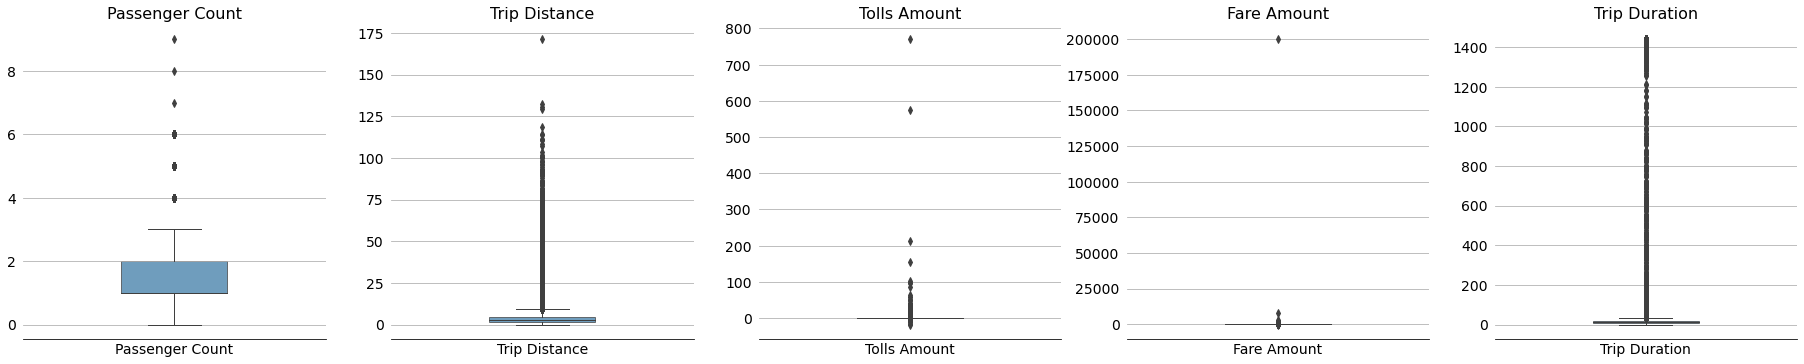

In [26]:
# Display boxplots of numerical columns
plot_boxplot(records_df, num_cols, num_colnames, ncols=len(num_cols))

**Notes:** The distribution of variables such as number of passengers, distance traveled, toll amount, trip amount, and trip duration is heavily skewed by the presence of many near-zero values and outliers. We will not eliminate the near-zero values because they correspond to real and frequent trips, but we will eliminate most of the outliers while trying to preserve some degree of variability so that our models can correctly estimate the duration of non-conventional taxi trips.

In [27]:
# Compute the numerical columns' 75, 95, and 99th percentiles
percentiles_df = records_df.quantile([0.75, 0.95, 0.99])[num_cols].reset_index()

# Display the numerical columns' 75, 95, and 99th percentiles
percentiles_df

,index,passenger_count,trip_distance,tolls_amount,fare_amount,trip_duration
0,0.75,2.0,4.715366,0.00,14.5,18.083333
1,0.95,5.0,17.187751,5.76,36.0,36.950000
2,0.99,6.0,30.368246,5.76,52.0,61.816667


**Notes:** the table above shows the 75th, 95th, and 99th of numerical variables, including passagenger count, trip distance, tolls and fare amounts, and trip duration.

In [28]:
# Define the descriptive statistics to display
perc_statistics = ['count', 'mean', 'std', 'min', 'max']

# Get the numerical columns' 75th percentiles
perc_75 = percentiles_df[percentiles_df['index'] == 0.75]

# Compute and display descriptive statistics for records above the column's 75th percentile
outliers_distribution(records_df, num_cols, perc_statistics, perc_75)

,passenger_count,trip_distance,tolls_amount,fare_amount,trip_duration
count,150381.00,280562.00,60274.00,267833.00,280121.00
mean,4.43,12.05,6.25,28.56,41.92
std,1.13,8.14,4.71,387.06,129.04
min,3.00,4.73,0.01,14.55,18.10
max,9.00,171.31,770.76,200005.50,1439.97


**Notes:** the table above shows the descriptive statistics of the numerical variables for records marked as outliers, if the 75th percentile was used as the upper threshold. Depending on the variable, up to one-third of the data set could be didscarded and only the most common taxi trips would be retained.

In [29]:
# Get the numerical columns' 95th percentiles
perc_95 = percentiles_df[percentiles_df['index'] == 0.95]

# Compute and display descriptive statistics for records above the column's 95th percentile
outliers_distribution(records_df, num_cols, perc_statistics, perc_95)

,passenger_count,trip_distance,tolls_amount,fare_amount,trip_duration
count,30664.00,56104.00,3698.00,55393.00,56111.00
mean,6.00,25.75,14.53,54.99,110.49
std,0.02,6.96,16.91,850.53,277.76
min,6.00,17.20,5.77,36.04,36.97
max,9.00,171.31,770.76,200005.50,1439.97


**Notes:** the table above shows the descriptive statistics of the numerical variables for records marked as outliers, if the 95th percentile was used as the upper threshold. Depending on the variable, up to 7% of the data set could be discarded, but trips diversity would be greater than if the 75th percentile were used. It would also discard taxi trips with more than five passengers. However, for the other variables, using the 95th percentile would lead to the exclusion of long-distance and flat-rate rides, including those between Manhattan and JFK Airport, as reported in the [official NYC FAQ](https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page).

In [30]:
# Get the numerical columns' 99th percentiles
perc_99 = percentiles_df[percentiles_df['index'] == 0.99]

# Compute and display descriptive statistics for records above the column's 99th percentile
outliers_distribution(records_df, num_cols, perc_statistics, perc_99)

,passenger_count,trip_distance,tolls_amount,fare_amount,trip_duration
count,3.0,11208.00,3698.00,8727.00,11214.00
mean,8.0,35.23,14.53,97.53,369.75
std,1.0,7.35,16.91,2142.37,549.42
min,7.0,30.38,5.77,52.06,61.83
max,9.0,171.31,770.76,200005.50,1439.97


**Notes:** the table above shows the descriptive statistics of the numerical variables for records marked as outliers, if the 99th percentile was used as the upper threshold.  Depending on the variable, up to 1.5% of the data set could be discarded. The diversity of trips would be much greater than if the 75th and 95th percentiles were used. By using the 99th percentile, the most extreme or erroneous trips would be discarded, while retaining a high degree of variability, which would help our predictive model estimate the duration of non-conventional cab trips. We will thus use mostly the 99th and 95th percentil to delete outliers from the data set.

In [31]:
# Discards records with passenger counts above the 95th percentile and below or equal to 0
records_df = records_df.loc[
    (records_df['passenger_count'] <= percentiles_df['passenger_count'].iloc[1])
    & (records_df['passenger_count'] > 0)
]

# Discards records with toll amounts above the 99th percentile and below or equal to 0
records_df = records_df.loc[
    (records_df['trip_distance'] <= percentiles_df['trip_distance'].iloc[2])
    & (records_df['trip_distance'] > 0)
]

# Discards records with tolls amounts above the 99th percentile and below 0
records_df = records_df.loc[
    (records_df['tolls_amount'] <= percentiles_df['tolls_amount'].iloc[2])
    & (records_df['trip_distance'] >= 0)
]

# Discards records with fare amounts above the 99th percentile and below 0
records_df = records_df.loc[
    (records_df['fare_amount'] <= percentiles_df['fare_amount'].iloc[2])
    & (records_df['fare_amount'] > 0)
]

# Discards records with trip duration above the 99 percentile and below 1
records_df = records_df.loc[
    (records_df['trip_duration'] <= percentiles_df['trip_duration'].iloc[2])
    & (records_df['trip_duration'] > 1)
]

# Display some descriptive statistics
records_df.describe().round(2)

,passenger_count,trip_distance,tolls_amount,fare_amount,pickup_location_id,dropoff_location_id,trip_duration
count,1047750.00,1047750.00,1047750.00,1047750.00,1047750.00,1047750.00,1047750.00
mean,1.49,4.21,0.24,11.93,163.52,161.75,13.52
std,1.01,4.78,1.14,8.73,66.54,69.94,9.71
min,1.00,0.02,0.00,0.01,1.00,1.00,1.02
25%,1.00,1.56,0.00,6.50,114.00,112.00,6.62
50%,1.00,2.57,0.00,9.00,162.00,162.00,10.87
75%,2.00,4.54,0.00,14.00,233.00,233.00,17.58
max,5.00,30.37,5.76,52.00,265.00,265.00,61.82


**Note:** The 95th percentile was used to discard outliers from the passenger count column, while the 99th percentile was used to discard outliers and erroneous records from all other columns. Approximately 7% of the data set was discarded.

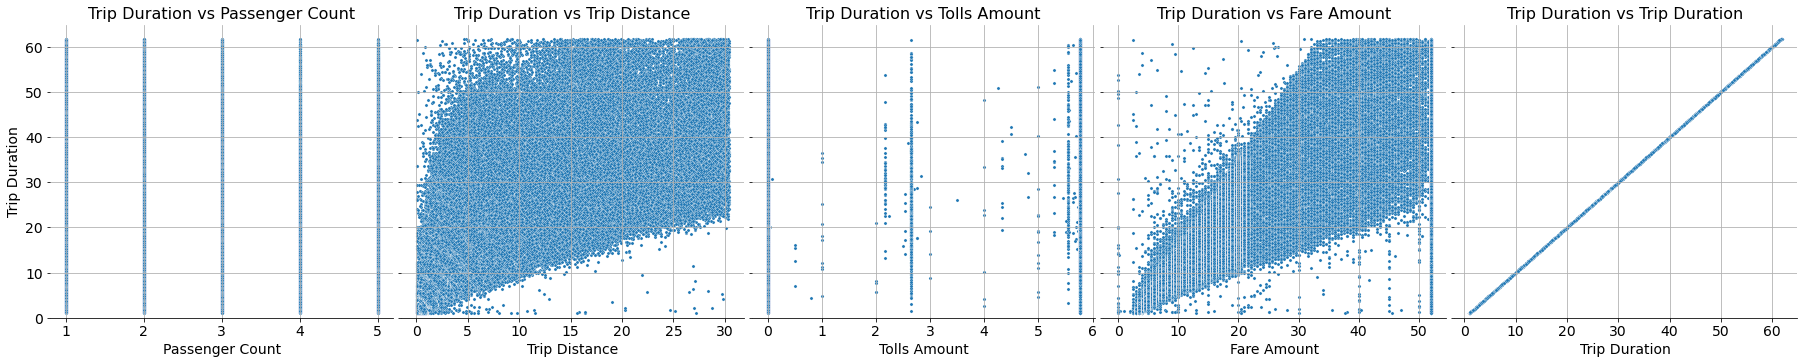

In [32]:
# Display scatterplots of numerical columns
plot_scatter(records_df, num_cols, num_colnames, 'trip_duration', ncols=len(num_cols))

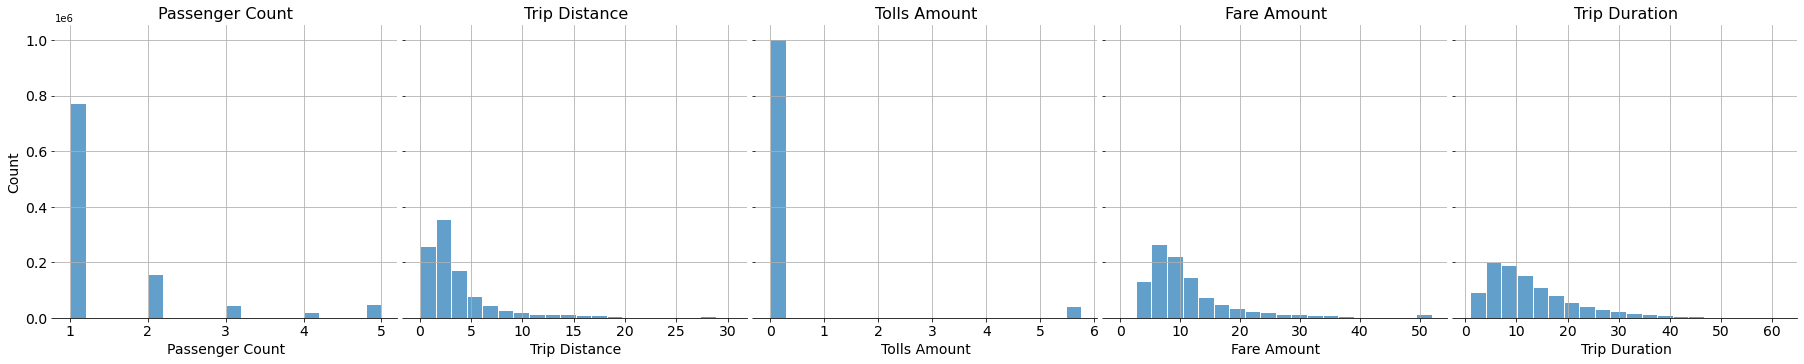

In [33]:
# Display histograms of numerical columns
plot_histplot(records_df, num_cols, num_colnames, ncols=len(num_cols))

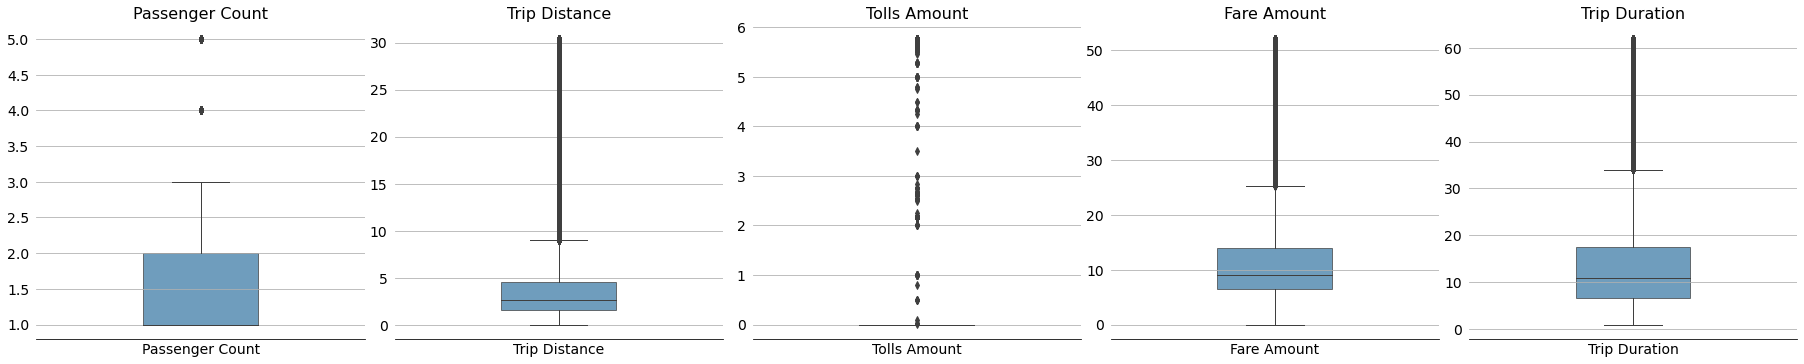

In [34]:
# Display boxplots of numerical columns
plot_boxplot(records_df, num_cols, num_colnames, ncols=len(num_cols))

**Notes:** After removing the extreme and spurious values from the data set, we can observe a strong correlation between travel time and distance and fare amount. In addition, each variable has a righ-skewed distribution. Therefore, we will need to normalize the data before using it to train our different models. Below, we will proceed with feature engineering and then encoding, starting with the date and time of pickup.

### T

In [35]:
# Add a new column containing the date
records_df["pickup_date"] = records_df["pickup_datetime"].dt.date

# Add a new column containing the month of the year
records_df["pickup_month"] = records_df["pickup_datetime"].dt.month

# Add a new column containing the week of the year
records_df["pickup_week"] = records_df["pickup_datetime"].dt.isocalendar().week

# Add a new column containing the day of the year
records_df["pickup_yearday"] = records_df["pickup_datetime"].dt.dayofyear

# Add a new column containing the weekday of the week
records_df["pickup_weekday"] = records_df["pickup_datetime"].dt.weekday

# Add a new column containing the type of weekday (week=0, weekend=1)
records_df["pickup_weekday_type"] = np.where(records_df["pickup_weekday"] < 5, 0, 1)

# Add a new column containing the hour of the day
records_df["pickup_hour"] = records_df["pickup_datetime"].dt.hour

# Add a new column containing the type of hour (night=0, day=1)
records_df["pickup_hour_type"] = np.where(
    (records_df["pickup_hour"] < 6) | (records_df["pickup_hour"] > 21), 0, 1
)

# Display the first five rows of the data frame
records_df.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,tolls_amount,fare_amount,pickup_location_id,dropoff_location_id,trip_duration,pickup_date,pickup_month,pickup_week,pickup_yearday,pickup_weekday,pickup_weekday_type,pickup_hour,pickup_hour_type
0,2018-04-26 12:11:19,2018-04-26 12:24:34,3,14.323126,2.64,25.0,143,220,13.250000,2018-04-26,4,17,116,3,0,12,1
1,2018-06-19 10:02:34,2018-06-19 10:45:46,1,25.491946,0.00,48.0,138,85,43.200000,2018-06-19,6,25,170,1,0,10,1
2,2018-09-05 13:51:40,2018-09-05 14:33:07,1,17.863674,5.76,37.5,138,142,41.450000,2018-09-05,9,36,248,2,0,13,1
3,2018-05-11 10:20:58,2018-05-11 10:46:27,2,13.663297,0.00,27.5,45,41,25.483333,2018-05-11,5,19,131,4,0,10,1
5,2018-08-09 19:42:24,2018-08-09 20:14:05,1,18.185542,0.00,35.0,173,144,31.683333,2018-08-09,8,32,221,3,0,19,1


**Notes:** using on the pickup date and time column, we created seven new variables, including the date, month of year, day of year, day of week, type of day (weekday, weekend), time of day, and peak hours. The time range used for the peak hours was determined using the daily traffic data analysis available on the [tomtom website](https://www.tomtom.com/en_gb/traffic-index/new-york-traffic/).

In [36]:
# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047750 entries, 0 to 1122345
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   pickup_datetime      1047750 non-null  datetime64[ns]
 1   dropoff_datetime     1047750 non-null  datetime64[ns]
 2   passenger_count      1047750 non-null  int64         
 3   trip_distance        1047750 non-null  float64       
 4   tolls_amount         1047750 non-null  float64       
 5   fare_amount          1047750 non-null  float64       
 6   pickup_location_id   1047750 non-null  int64         
 7   dropoff_location_id  1047750 non-null  int64         
 8   trip_duration        1047750 non-null  float64       
 9   pickup_date          1047750 non-null  object        
 10  pickup_month         1047750 non-null  int64         
 11  pickup_week          1047750 non-null  UInt32        
 12  pickup_yearday       1047750 non-null  int64         
 1

**Notes:** with the exception of the date column, seven new features have been created. The date column will be used below to merge the weather forecast and holidays data frames with the primary data set.

In [37]:
# Convert pickup date to datetime
records_df['pickup_date'] = pd.to_datetime(records_df['pickup_date'])

In [38]:
# Add the weather forecast data to the main dataset
records_df = pd.merge(
    records_df,
    weather_df,
    how="left",
    left_on="pickup_date",
    right_on="date",
)

# Add the holidays data to the main dataset
records_df = pd.merge(
    records_df,
    holidays_df,
    how="left",
    left_on="pickup_date",
    right_on="holiday_date",
)

# Drop datetime columns
records_df.drop(columns=records_df.select_dtypes(include=["datetime64"]), inplace=True)

# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047750 entries, 0 to 1047749
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   passenger_count      1047750 non-null  int64  
 1   trip_distance        1047750 non-null  float64
 2   tolls_amount         1047750 non-null  float64
 3   fare_amount          1047750 non-null  float64
 4   pickup_location_id   1047750 non-null  int64  
 5   dropoff_location_id  1047750 non-null  int64  
 6   trip_duration        1047750 non-null  float64
 7   pickup_month         1047750 non-null  int64  
 8   pickup_week          1047750 non-null  UInt32 
 9   pickup_yearday       1047750 non-null  int64  
 10  pickup_weekday       1047750 non-null  int64  
 11  pickup_weekday_type  1047750 non-null  int64  
 12  pickup_hour          1047750 non-null  int64  
 13  pickup_hour_type     1047750 non-null  int64  
 14  avg_temp             1047750 non-null  int64  
 15

**Notes:** after merging the weather and vacation data frame with the primary data set, the NaNs in the vacation and vacation type columns will need to be filled with zeros to indicate no vacations on those days.

In [39]:
# Fill missing values from the holidays_type with 0
records_df["holiday_type"] = records_df["holiday_type"].fillna(0)

# Fill missing values from the holidays with 0
records_df["holiday"] = records_df["holiday"].fillna(0)

# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047750 entries, 0 to 1047749
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   passenger_count      1047750 non-null  int64  
 1   trip_distance        1047750 non-null  float64
 2   tolls_amount         1047750 non-null  float64
 3   fare_amount          1047750 non-null  float64
 4   pickup_location_id   1047750 non-null  int64  
 5   dropoff_location_id  1047750 non-null  int64  
 6   trip_duration        1047750 non-null  float64
 7   pickup_month         1047750 non-null  int64  
 8   pickup_week          1047750 non-null  UInt32 
 9   pickup_yearday       1047750 non-null  int64  
 10  pickup_weekday       1047750 non-null  int64  
 11  pickup_weekday_type  1047750 non-null  int64  
 12  pickup_hour          1047750 non-null  int64  
 13  pickup_hour_type     1047750 non-null  int64  
 14  avg_temp             1047750 non-null  int64  
 15

**Notes:** null values have been replaced by zeros.

In [40]:
# Add the zones data, i.e. pickup_borough_id to the main dataset
records_df = (
    pd.merge(
        records_df,
        zones_df[["LocationID", "BoroughID"]],
        how="left",
        left_on="pickup_location_id",
        right_on="LocationID",
    )
    .rename(columns={"BoroughID": "pickup_borough_id"})
    .drop("LocationID", axis="columns")
)

# Add the zones data, i.e. pickup_borough_id to the main dataset
records_df = (
    pd.merge(
        records_df,
        zones_df[["LocationID", "BoroughID"]],
        how="left",
        left_on="dropoff_location_id",
        right_on="LocationID",
    )
    .rename(columns={"BoroughID": "dropoff_borough_id"})
    .drop("LocationID", axis="columns")
)

# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048054 entries, 0 to 1048053
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   passenger_count      1048054 non-null  int64  
 1   trip_distance        1048054 non-null  float64
 2   tolls_amount         1048054 non-null  float64
 3   fare_amount          1048054 non-null  float64
 4   pickup_location_id   1048054 non-null  int64  
 5   dropoff_location_id  1048054 non-null  int64  
 6   trip_duration        1048054 non-null  float64
 7   pickup_month         1048054 non-null  int64  
 8   pickup_week          1048054 non-null  UInt32 
 9   pickup_yearday       1048054 non-null  int64  
 10  pickup_weekday       1048054 non-null  int64  
 11  pickup_weekday_type  1048054 non-null  int64  
 12  pickup_hour          1048054 non-null  int64  
 13  pickup_hour_type     1048054 non-null  int64  
 14  avg_temp             1048054 non-null  int64  
 15

**Notes:** the pickup and dropoff borough columns contain null values. 

In [41]:
# Display the list of pickup location id where pickup borough was null
records_df.loc[records_df["pickup_borough_id"].isna(), "pickup_location_id"].unique()

array([264, 265, 105,  57])

In [42]:
# Display the list of dropoff location id where drop borough was null
records_df.loc[records_df["dropoff_borough_id"].isna(), "dropoff_location_id"].unique()

array([265, 264,  57])

**Notes:** These null values are due to pickup location 264 and 265, which are used as surrogates when the origin or destination of trips is unknown. we can therefore safely drop these records from the dataset.

In [43]:
# Drop all rows containing NaNs
records_df.dropna(inplace=True)

# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031677 entries, 0 to 1048053
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   passenger_count      1031677 non-null  int64  
 1   trip_distance        1031677 non-null  float64
 2   tolls_amount         1031677 non-null  float64
 3   fare_amount          1031677 non-null  float64
 4   pickup_location_id   1031677 non-null  int64  
 5   dropoff_location_id  1031677 non-null  int64  
 6   trip_duration        1031677 non-null  float64
 7   pickup_month         1031677 non-null  int64  
 8   pickup_week          1031677 non-null  UInt32 
 9   pickup_yearday       1031677 non-null  int64  
 10  pickup_weekday       1031677 non-null  int64  
 11  pickup_weekday_type  1031677 non-null  int64  
 12  pickup_hour          1031677 non-null  int64  
 13  pickup_hour_type     1031677 non-null  int64  
 14  avg_temp             1031677 non-null  int64  
 15

**Notes:** records with unknown origins and destinations have been removed from the dataset. Below, we will create an additional variable, to indicate whether the trip was made in the same borough. We will also bin the toll amounts into three separate categories ranging from 0 to 3, with 0 indicating no tolls and 3 indicating the highest amount. Finaly we will drop features that should not be used by our model for the prediction of trip time duration.

In [44]:
# Create a new column indicating if the trip was within the same borough
records_df["trip_within_borough"] = np.where(
    records_df["pickup_borough_id"] == records_df["dropoff_borough_id"], 1, 0
)

# Create a new column of binned tolls amounts
records_df["toll"] = records_df["tolls_amount"].apply(
    lambda x: 0 if x == 0 else (1 if x < 3 else 2)
)
# Drop other columns
records_df.drop(
    columns=["passenger_count", "fare_amount", "tolls_amount"], inplace=True
)

# Display a quick description of the data frame
records_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031677 entries, 0 to 1048053
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trip_distance        1031677 non-null  float64
 1   pickup_location_id   1031677 non-null  int64  
 2   dropoff_location_id  1031677 non-null  int64  
 3   trip_duration        1031677 non-null  float64
 4   pickup_month         1031677 non-null  int64  
 5   pickup_week          1031677 non-null  UInt32 
 6   pickup_yearday       1031677 non-null  int64  
 7   pickup_weekday       1031677 non-null  int64  
 8   pickup_weekday_type  1031677 non-null  int64  
 9   pickup_hour          1031677 non-null  int64  
 10  pickup_hour_type     1031677 non-null  int64  
 11  avg_temp             1031677 non-null  int64  
 12  prec                 1031677 non-null  int64  
 13  new_snow             1031677 non-null  int64  
 14  snow_depth           1031677 non-null  int64  
 15

***
## Data Export

In [45]:
# Export the train data frame as a pickle file
train_df.to_pickle(r'data/processed/train.pickle')

# Export the test data frame as a pickle file
test_df.to_pickle(r'data/processed/test.pickle')